In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA

In [ ]:
!ls

drive  gdrive  sample_data


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


Size(dim):  (612, 397)


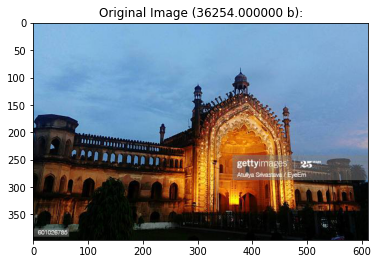

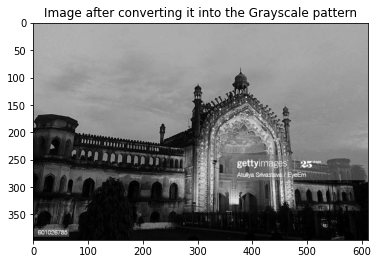

After compression: 


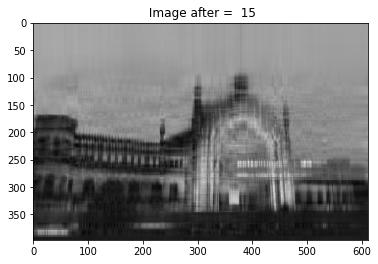

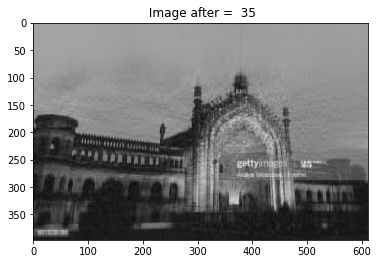

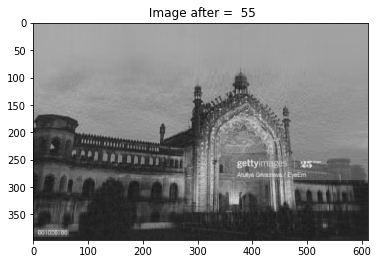

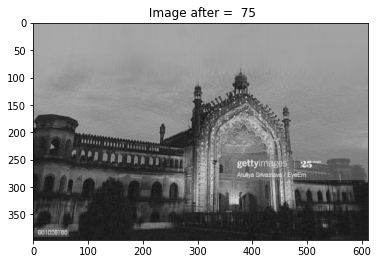

In [42]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

path = 'gettyimages-601026785-612x612.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))
print("Size(dim): ",img.size)
plt.title("Original Image (%f b):" %s)
plt.imshow(img)

img_gray = img.convert('L') # L (8-bit pixels, black and white) 
imgmat = np.array( list(img_gray.getdata(band = 0)), float)
imgmat.shape = (img_gray.size[1], img_gray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

print("After compression: ")
U, S, Vt = LA.svd(imgmat) #single value decomposition
for i in range(15, 80, 20):  # using first i singular values
    rimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(rimg, cmap = 'gray')
    title = " Image after =  %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((rimg ).astype(np.uint8))
result.save('compressed.jpg')